In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import missingno as ms

Import and Pre-processing Data

In [33]:
df = pd.read_csv("data/csv/aceh_production_data_daily_ed.csv", parse_dates=True)

In [34]:
df = df.sort_values(by=["DATEPRD"]).reset_index().drop(columns=['index'])

In [35]:
df = df.drop(columns="FLOW_KIND")

In [36]:
df

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0      2007-09-01        Well-N2            NaN                    NaN   
1      2007-09-01        Well-W2            NaN                    NaN   
2      2007-09-02        Well-W2            NaN                    NaN   
3      2007-09-02        Well-N2            NaN                    NaN   
4      2007-09-03        Well-W2            NaN                    NaN   
...           ...            ...            ...                    ...   
15629  2016-10-05        Well-W2            NaN                    NaN   
15630  2016-10-06        Well-W2            NaN                    NaN   
15631  2016-10-07        Well-W2            NaN                    NaN   
15632  2016-11-01        Well-W2            NaN                    NaN   
15633  2016-12-01        Well-W2            NaN                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  \
0                           NaN            NaN        NaN        NaN   
1                           NaN            NaN        NaN        NaN   
2                           NaN            NaN        NaN        NaN   
3                           NaN            NaN        NaN        NaN   
4                           NaN            NaN        NaN        NaN   
...                         ...            ...        ...        ...   
15629                       NaN            NaN        NaN        NaN   
15630                       NaN            NaN        NaN        NaN   
15631                       NaN            NaN        NaN        NaN   
15632                       NaN            NaN        NaN        NaN   
15633                       NaN            NaN        NaN        NaN   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
0                NaN           NaN           NaN           NaN          NaN  
1                NaN           NaN           NaN           NaN          NaN  
2                NaN           NaN           NaN           NaN          NaN  
3                NaN           NaN           NaN           NaN          NaN  
4                NaN           NaN           NaN           NaN          NaN  
...              ...           ...           ...           ...          ...  
15629            NaN           NaN           NaN           NaN          NaN  
15630            NaN           NaN           NaN           NaN          NaN  
15631            NaN           NaN           NaN           NaN          NaN  
15632            NaN           NaN           NaN           NaN          NaN  
15633            NaN           NaN           NaN           NaN          NaN  

[15634 rows x 13 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   WELL_BORE_CODE            15634 non-null  object 
 2   ON_STREAM_HRS             15349 non-null  float64
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 5   AVG_DP_TUBING             8980 non-null   float64
 6   AVG_WHP_P                 9155 non-null   float64
 7   AVG_WHT_P                 9146 non-null   float64
 8   DP_CHOKE_SIZE             15340 non-null  float64
 9   BORE_OIL_VOL              9161 non-null   float64
 10  BORE_GAS_VOL              9161 non-null   float64
 11  BORE_WAT_VOL              9161 non-null   float64
 12  BORE_WI_VOL               5706 non-null   float64
dtypes: float64(11), object(2)
memory usage: 1.6+ MB


In [38]:
df["DATEPRD"] = df["DATEPRD"].astype("datetime64")

In [39]:
# sanity check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_WHP_P                 9155 non-null   float64       
 7   AVG_WHT_P                 9146 non-null   float64       
 8   DP_CHOKE_SIZE             15340 non-null  float64       
 9   BORE_OIL_VOL              9161 non-null   float64       
 10  BORE_GAS_VOL              9161 non-null   float64       
 11  BORE_WAT_VOL              9161 non-null   float64       
 12  BORE_WI_VOL       

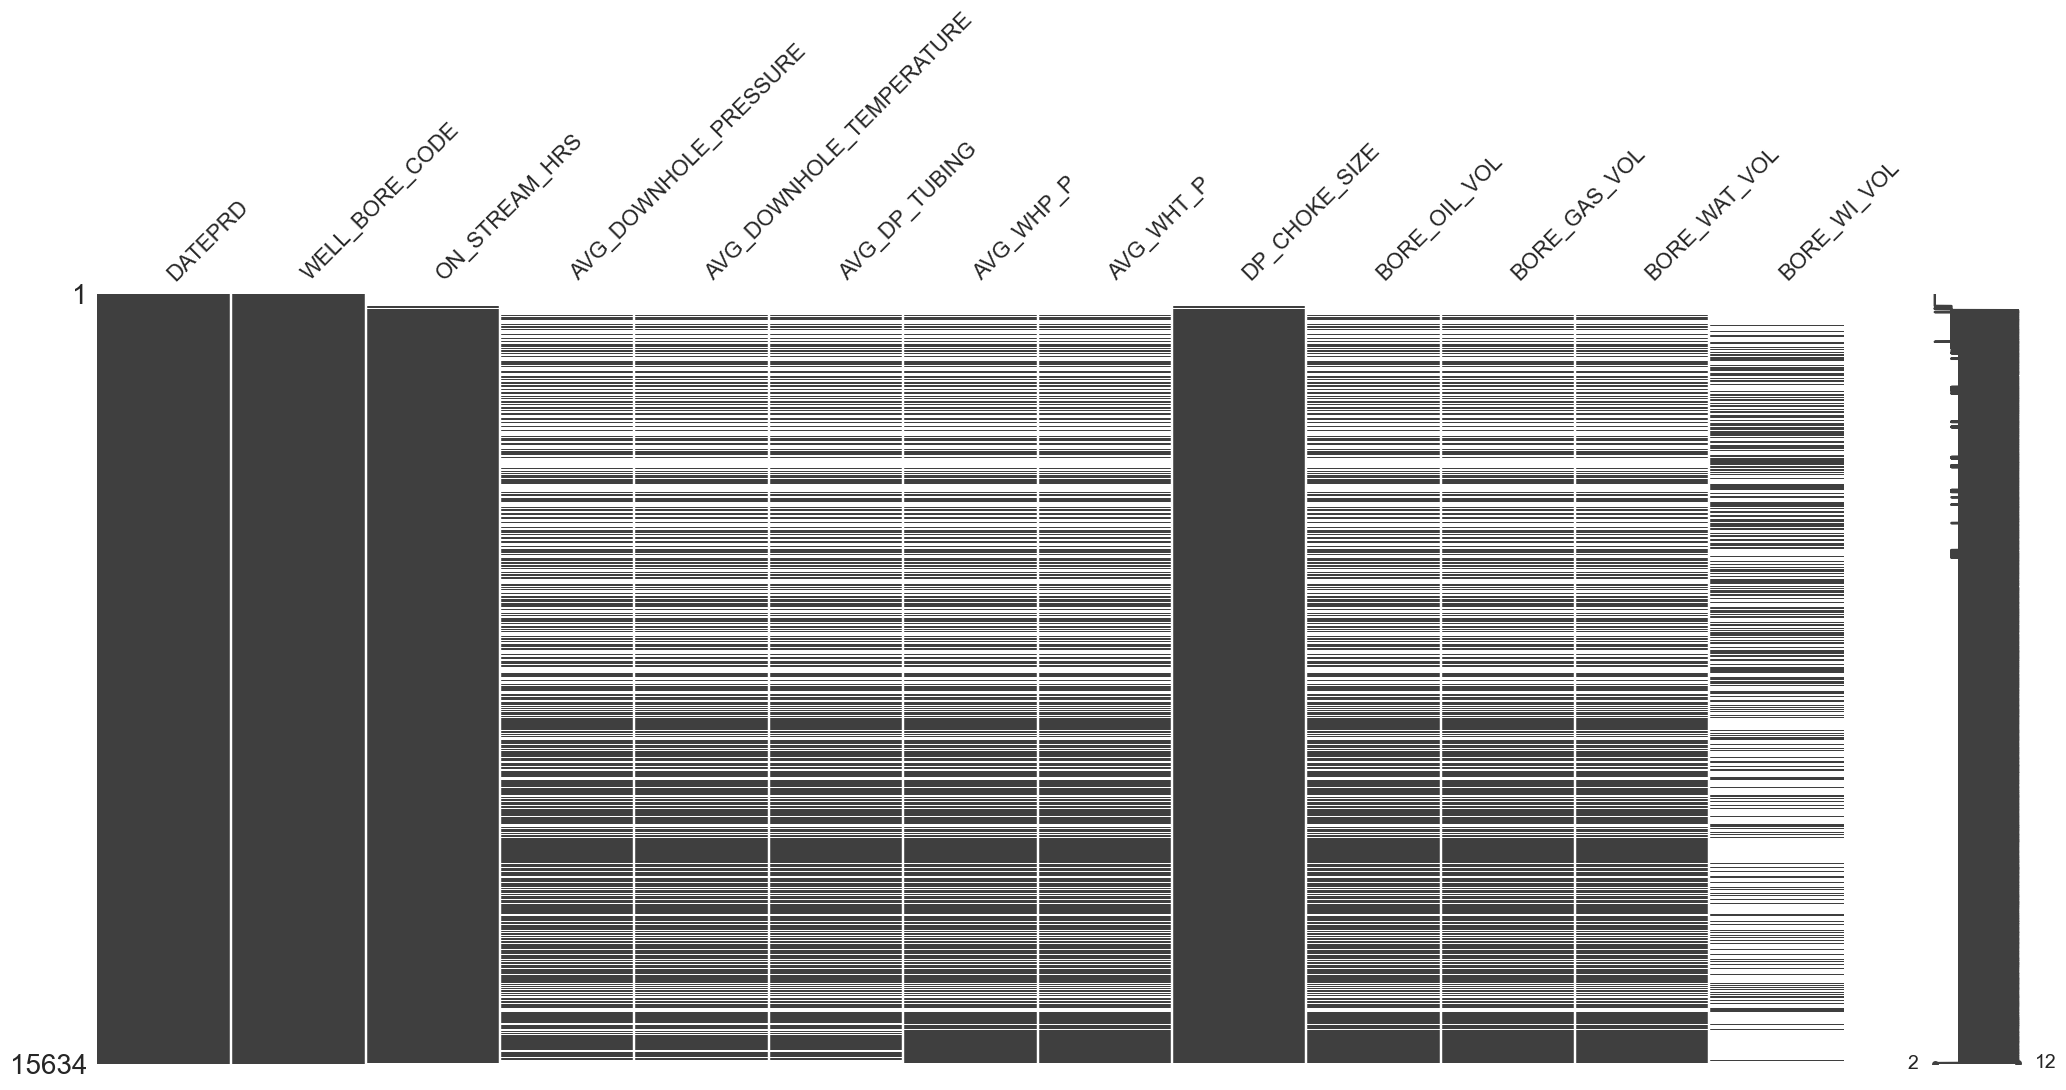

In [40]:
ms.matrix(df);

EDA

In [41]:
# we can choose to pick Well-C1 in case we want to benchmark them

# EDA
df_well_c1 = df[df["WELL_BORE_CODE"] == "Well-C1"]

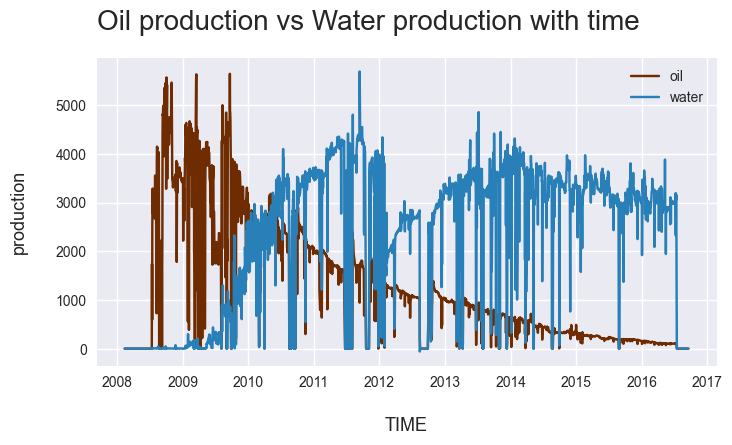

In [42]:
# EDA

# ['Well-N2', 'Well-W2', 'Well-C1', 'Well-W1', 'Well-N1', 'Well-S1', 'Well-E1']
df_well_c1 = df[df["WELL_BORE_CODE"] == "Well-C1"]

# main figure object
plt.figure(figsize= (8,4))
# make scatter plot between oil and gas production
plt.plot( df_well_c1["DATEPRD"], df_well_c1["BORE_OIL_VOL"],color="#6E2C00",label="oil") 
plt.plot(df_well_c1["DATEPRD"], df_well_c1["BORE_WAT_VOL"],color="#2980B9",label="water");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20)
plt.ylabel("production", fontsize= 13, labelpad = 20,loc="center")

# setting figure title 
plt.title("Oil production vs Water production with time ", fontsize= 20, pad = 20,loc="left")

plt.legend()
plt.show()

In [43]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 330 to 15605
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   ON_STREAM_HRS             3056 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 5   AVG_DP_TUBING             3050 non-null   float64       
 6   AVG_WHP_P                 3056 non-null   float64       
 7   AVG_WHT_P                 3056 non-null   float64       
 8   DP_CHOKE_SIZE             3056 non-null   float64       
 9   BORE_OIL_VOL              3056 non-null   float64       
 10  BORE_GAS_VOL              3056 non-null   float64       
 11  BORE_WAT_VOL              3056 non-null   float64       
 12  BORE_WI_VOL      

In [44]:
# we can try to use oil and water rate by using volumes/stream hrs
# also, on stream hrs cannot be 0 bcs it's going to make the calculations error
# we also want to delete column BORE_WI_VOL, since it is not correlated with our experiment
# we need to delete ON_STREAM_HRS, BORE_OIL_VOL, BORE_WAT_VOL, BORE_GAS_VOL to get rid of data leakage

df_well_c1 = df_well_c1.drop(columns="BORE_WI_VOL")

df_well_c1 = df_well_c1[df_well_c1["ON_STREAM_HRS"] > 0]

df_well_c1["oil_rate"] = df_well_c1["BORE_OIL_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1["water_rate"] = df_well_c1["BORE_WAT_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1 = df_well_c1.drop(columns = ["ON_STREAM_HRS", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL",])


In [45]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 936 to 15212
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2724 non-null   datetime64[ns]
 1   WELL_BORE_CODE            2724 non-null   object        
 2   AVG_DOWNHOLE_PRESSURE     2718 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2718 non-null   float64       
 4   AVG_DP_TUBING             2718 non-null   float64       
 5   AVG_WHP_P                 2724 non-null   float64       
 6   AVG_WHT_P                 2724 non-null   float64       
 7   DP_CHOKE_SIZE             2724 non-null   float64       
 8   oil_rate                  2724 non-null   float64       
 9   water_rate                2724 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 234.1+ KB


In [46]:
# we want to see the distribution of the data using graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

In [47]:
figure = make_subplots(
            rows=8, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="oil_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="water_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=2, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_PRESSURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_PRESSURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=3, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_TEMPERATURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_TEMPERATURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=4, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DP_TUBING",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DP_TUBING"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=5, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHP_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHP_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=6, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHT_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHT_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=7, col=1
    )

figure.add_trace(
    go.Scatter(
        name="DP_CHOKE_SIZE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["DP_CHOKE_SIZE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=8, col=1
    )

figure.update_layout(
            height=2000,
            autosize=True,  # Allow the figure to be autosized
            margin=dict(l=10, r=10, t=10, b=10),  # Adjust the margins for the figure
            legend=dict(
                x=0.75,   # Set the x position of the legend (0.5 means centered horizontally)
                y=1.0,   # Set the y position of the legend (1.0 means at the top)
                xanchor='center',  # Anchor point for the x position ('center' for center alignment)
                yanchor='top',     # Anchor point for the y position ('top' for top alignment)
                orientation='v',   # Orientation of the legend ('h' for horizontal)
                bgcolor='rgba(255, 255, 255, 0.5)',  # Background color of the legend (with transparency)
                # bordercolor='rgba(0, 0, 0, 0.5)',     # Border color of the legend (with transparency)
                # borderwidth=1       # Border width of the legend
            )
        )

figure.show()

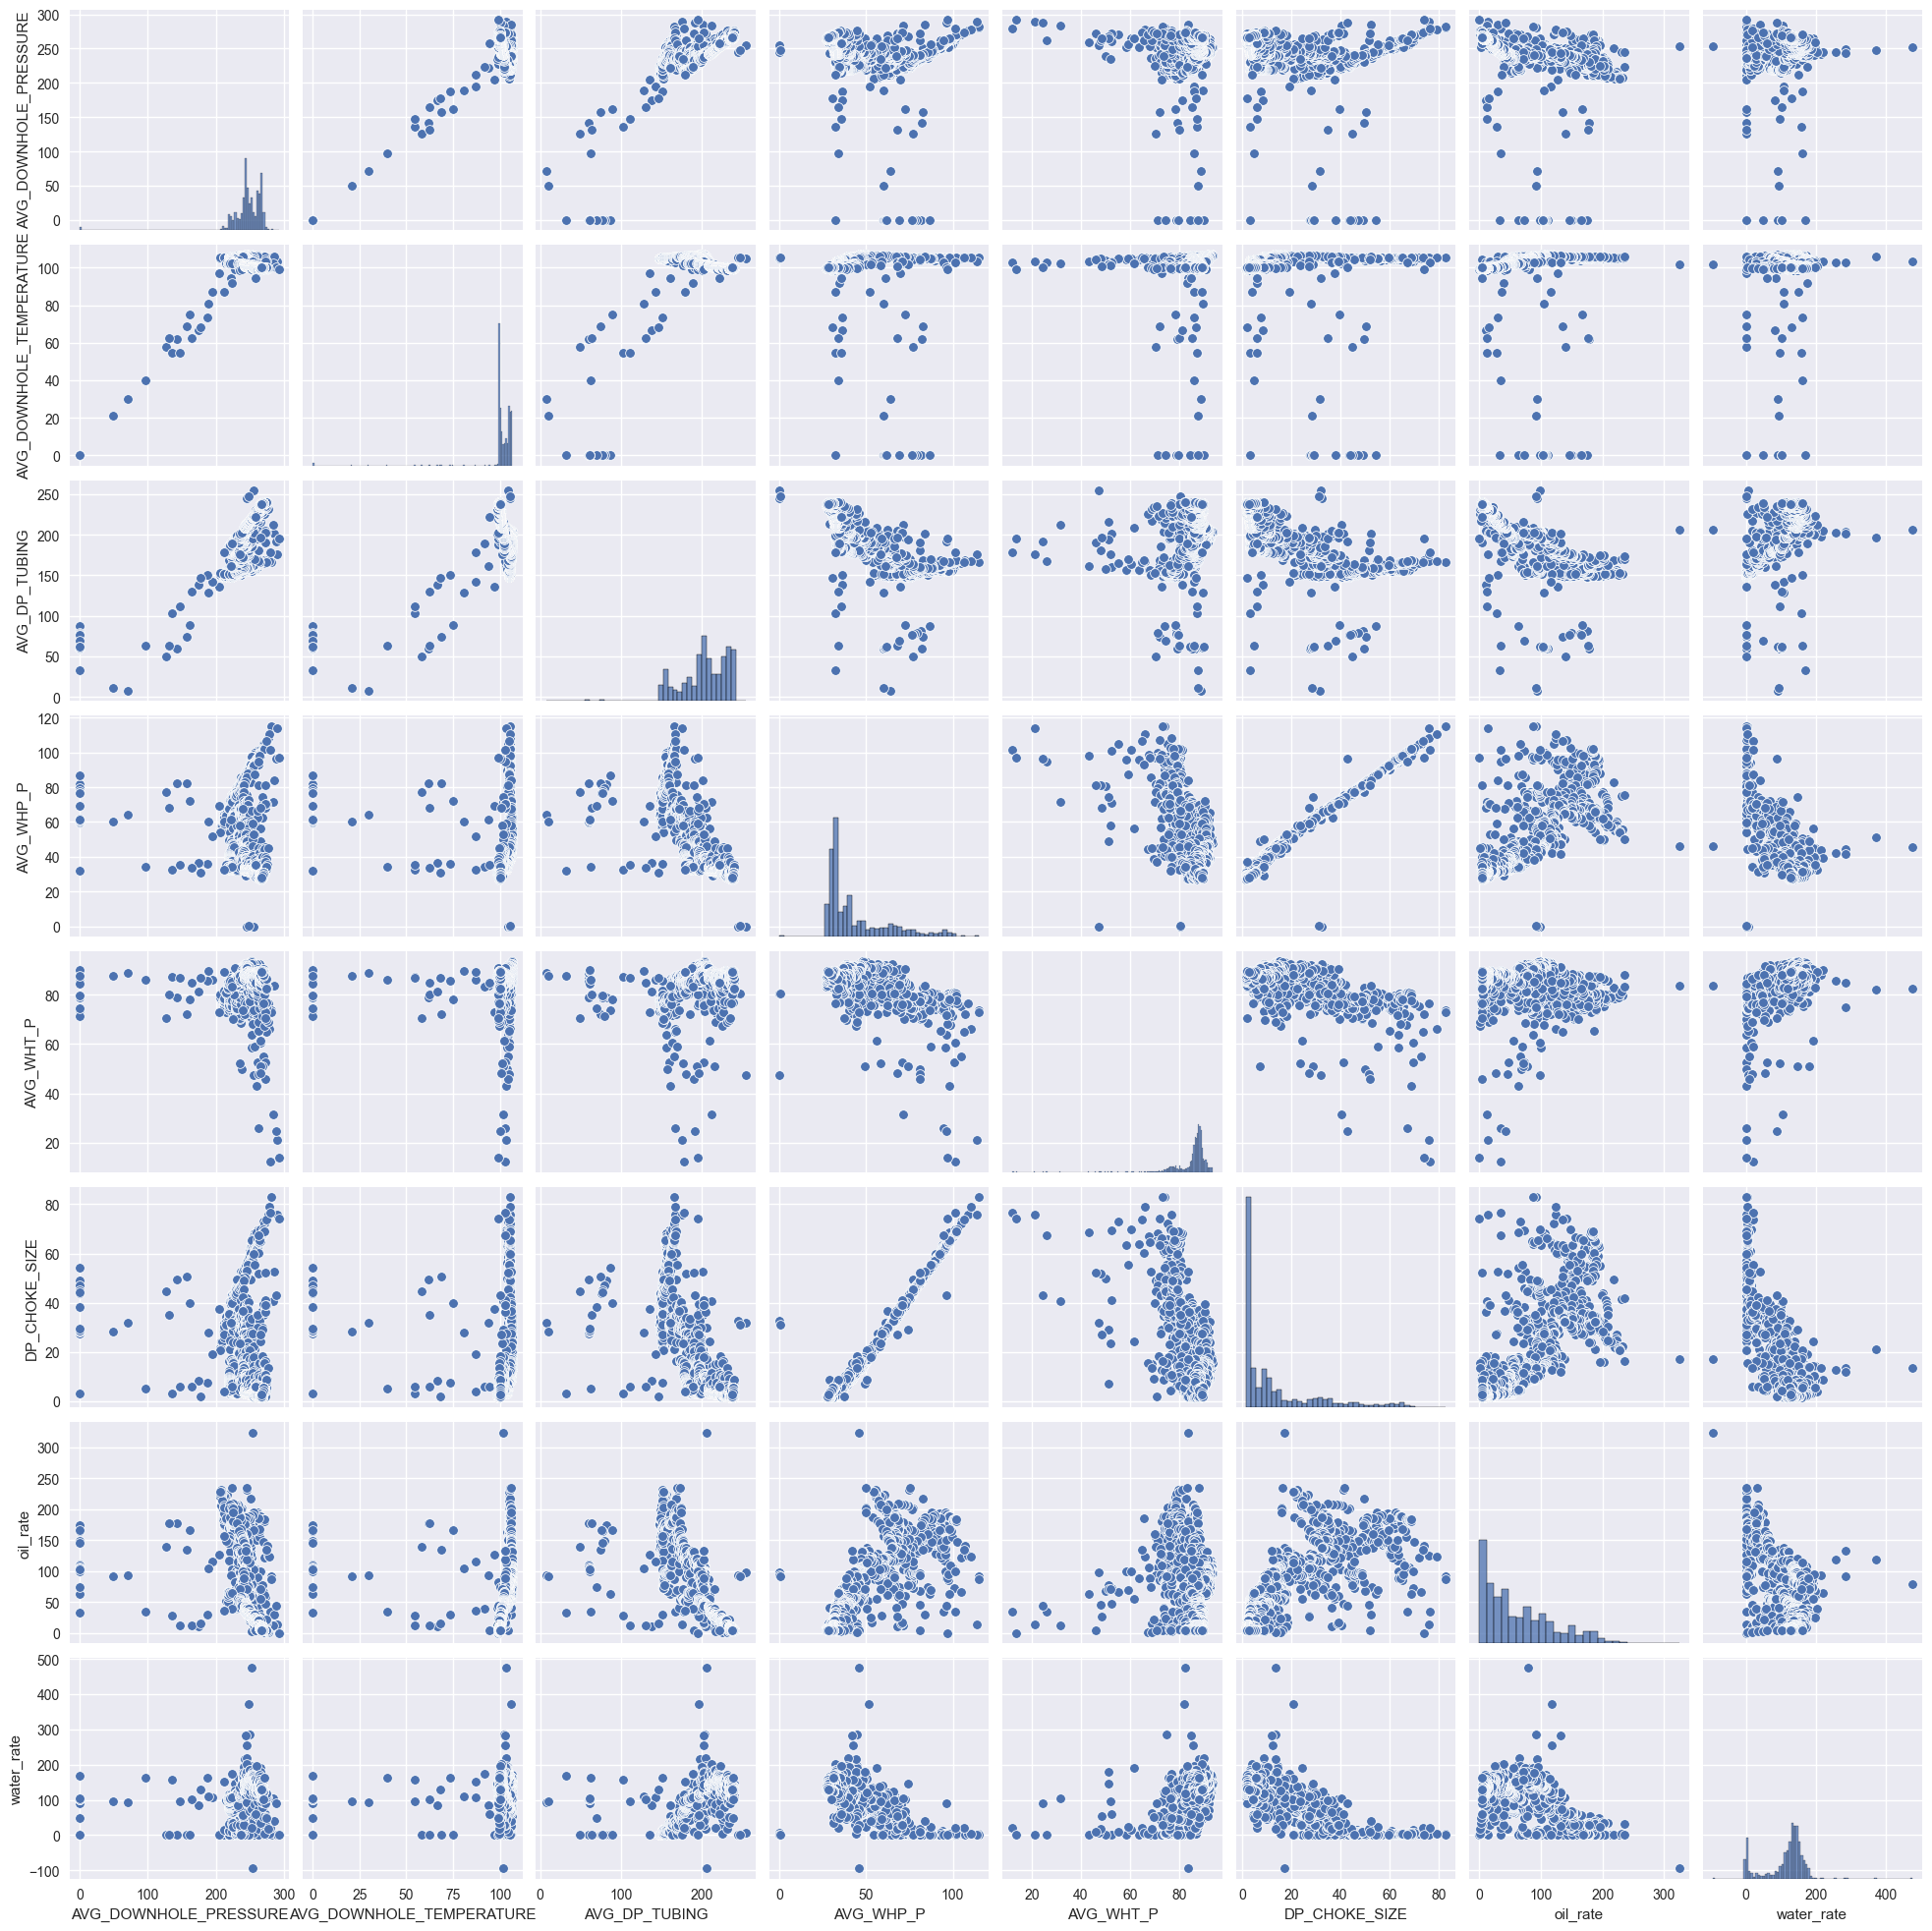

In [48]:
# have a look at all the scatter plots between all variables
sns.pairplot(df_well_c1);

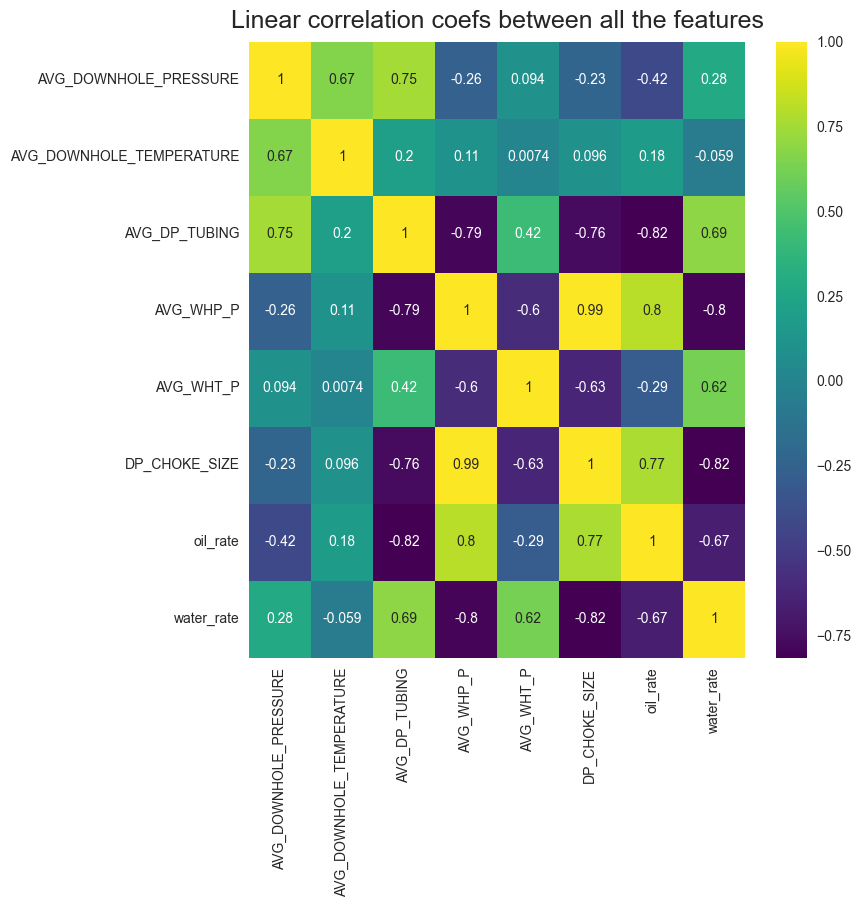

In [49]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

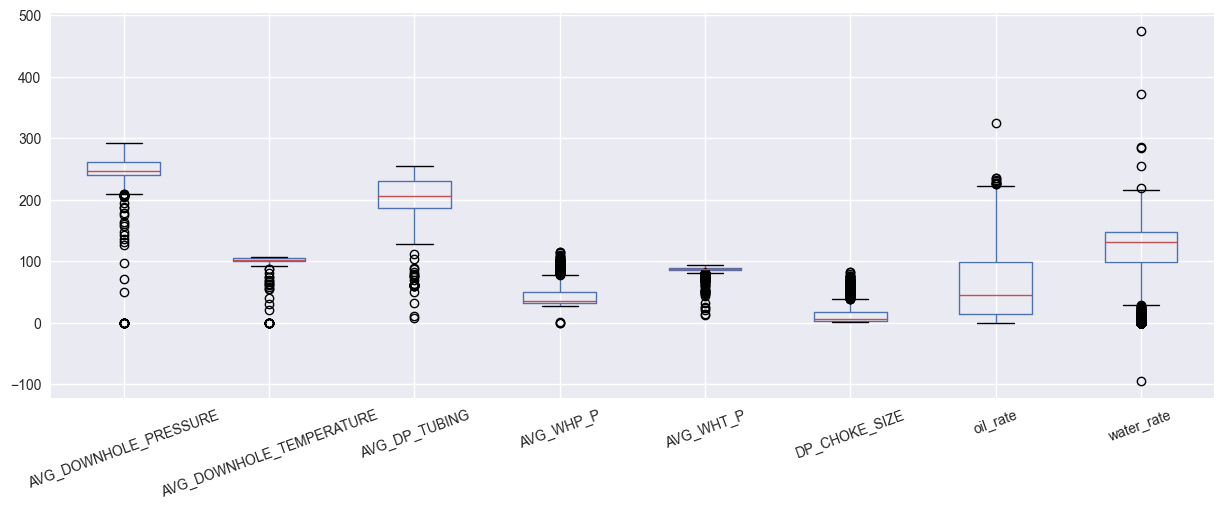

In [50]:
# show the data distribution to see if there is outliers
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20)
plt.show();

In [51]:
# from the heatmap, histogram, and boxplot, we recognize that there are some outliers from the data
# we need to minimize the number of outliers

df_well_c1 = df_well_c1[df_well_c1 != 0]
df_well_c1 = df_well_c1[df_well_c1["water_rate"] < 300]
df_well_c1 = df_well_c1[df_well_c1["oil_rate"] < 300]

df_well_c1.head()

DATEPRD WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  \
936 2008-07-13        Well-C1             260.866875   
939 2008-07-14        Well-C1             256.248230   
943 2008-07-15        Well-C1             254.982785   
946 2008-07-16        Well-C1             251.475921   
951 2008-07-17        Well-C1             249.346191   

     AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
936                103.292880     160.151955  100.714919  52.381899   
939                104.017718     156.649912   99.598318  71.115352   
943                103.967009     156.332844   98.649941  67.590753   
946                104.210557     155.817187   95.658734  73.782251   
951                104.339184     155.760939   93.585252  78.035440   

     DP_CHOKE_SIZE    oil_rate  water_rate  
936      69.539413   72.302500    0.166667  
939      68.016167  106.348294    0.245961  
943      66.948884  105.508750    0.243333  
946      63.663812  126.279583    0.380417  
951      61.337700  137.003333    0.315833

In [52]:
# remove the outliers from AVG_WHP_P and AVG_DP_TUBING
df_well_c1 = df_well_c1[df_well_c1["AVG_DP_TUBING"] > 100]
df_well_c1 = df_well_c1[ df_well_c1["AVG_WHP_P"] > 10 ]

In [53]:
# see the distribution of the dataset again
figure = make_subplots(
            rows=8, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="oil_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="water_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=2, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_PRESSURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_PRESSURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=3, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_TEMPERATURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_TEMPERATURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=4, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DP_TUBING",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DP_TUBING"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=5, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHP_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHP_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=6, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHT_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHT_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=7, col=1
    )

figure.add_trace(
    go.Scatter(
        name="DP_CHOKE_SIZE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["DP_CHOKE_SIZE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=8, col=1
    )

figure.update_layout(
            height=2000,
            autosize=True,  # Allow the figure to be autosized
            margin=dict(l=10, r=10, t=10, b=10),  # Adjust the margins for the figure
            legend=dict(
                x=0.75,   # Set the x position of the legend (0.5 means centered horizontally)
                y=1.0,   # Set the y position of the legend (1.0 means at the top)
                xanchor='center',  # Anchor point for the x position ('center' for center alignment)
                yanchor='top',     # Anchor point for the y position ('top' for top alignment)
                orientation='v',   # Orientation of the legend ('h' for horizontal)
                bgcolor='rgba(255, 255, 255, 0.5)',  # Background color of the legend (with transparency)
                # bordercolor='rgba(0, 0, 0, 0.5)',     # Border color of the legend (with transparency)
                # borderwidth=1       # Border width of the legend
            )
        )

figure.show()

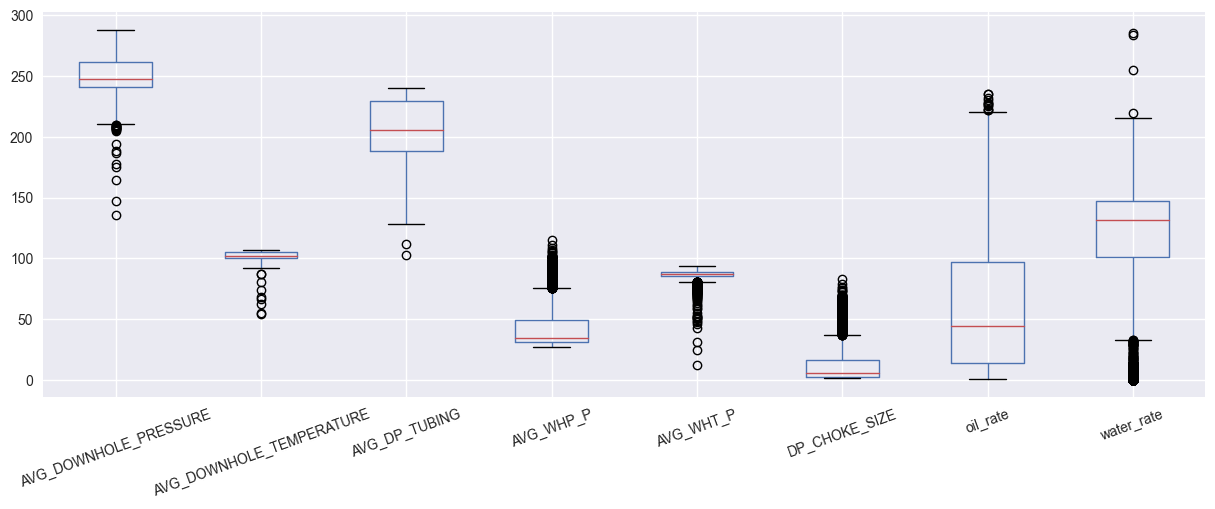

In [54]:
# show the data distribution to see if there is outliers
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20)
plt.show();

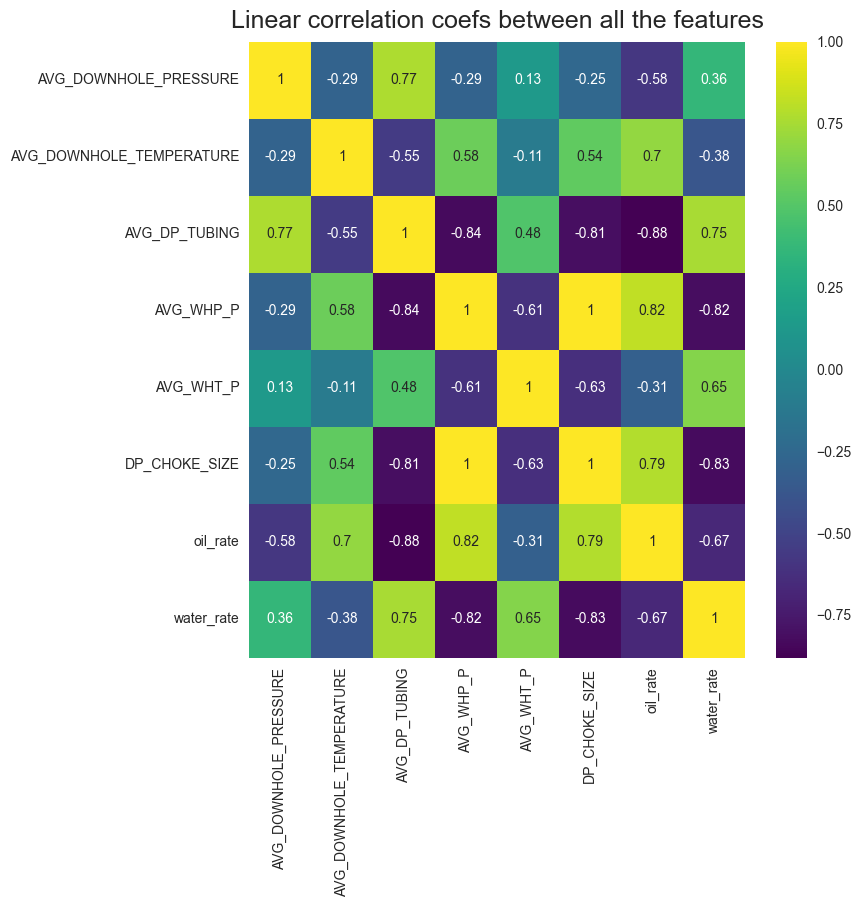

In [55]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

the outliers have been reduced, i think it's time to move on to the machine learning model

# ML Models

split input-output

In [56]:
# change from dates into days

df = df_well_c1
# df
df["days"] = (df["DATEPRD"] - df["DATEPRD"].min()).dt.days

In [79]:
X = df[["days",'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'
     ,'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE']]
y_oil = df[['oil_rate']]
y_water = df[['water_rate']]

split train and test data FOR OIL

In [84]:
# using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_oil_train, y_oil_test = train_test_split(X, y_oil,
                                                    test_size = 0.2,
                                                    shuffle = False,
                                                    random_state = 123)

In [85]:
print(X_train.shape, X_test.shape)

(2148, 7) (537, 7)


In [86]:
X_train

days  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
936       0             260.866875                103.292880     160.151955   
939       1             256.248230                104.017718     156.649912   
943       2             254.982785                103.967009     156.332844   
946       3             251.475921                104.210557     155.817187   
951       4             249.346191                104.339184     155.760939   
...     ...                    ...                       ...            ...   
11482  2377             263.912484                 99.522058     232.153091   
11489  2378             263.866570                 99.519340     232.081087   
11496  2379             263.860900                 99.519340     232.071070   
11498  2380             263.860900                 99.519340     232.071070   
11504  2381             263.860900                 99.519340     232.071070   

        AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  
936    100.714919  52.381899      69.539413  
939     99.598318  71.115352      68.016167  
943     98.649941  67.590753      66.948884  
946     95.658734  73.782251      63.663812  
951     93.585252  78.035440      61.337700  
...           ...        ...            ...  
11482   31.759393  85.532730       2.111124  
11489   31.785483  85.484988       2.132832  
11496   31.789830  85.422720       2.153610  
11498   31.789830  85.422720       2.153610  
11504   31.789830  85.422720       2.153610  

[2148 rows x 7 columns]

In [87]:
y_oil_train

oil_rate
936     72.302500
939    106.348294
943    105.508750
946    126.279583
951    137.003333
...           ...
11482   12.542500
11489   12.717917
11496   11.762917
11498   12.414167
11504   12.559167

[2148 rows x 1 columns]

split train and test data FOR WATER

In [101]:
# using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_wat_train, y_wat_test = train_test_split(X, y_water,
                                                            test_size = 0.2,
                                                            shuffle = False,
                                                            random_state = 123)

In [103]:
y_wat_test

water_rate
11516  118.239091
11520  138.666667
11527  138.967083
11536  135.266250
11542  133.770833
...           ...
15186  102.628265
15194  132.727917
15197  129.138996
15205  131.204583
15212  128.089059

[537 rows x 1 columns]

use autoML - TPOTRegressor

In [140]:

from tpot import TPOTRegressor

# lets set 10 minutes as a max times to modeling this dataset

model_tpot_oil = TPOTRegressor(max_time_mins=10,
                                verbosity=2,
                                scoring="neg_mean_absolute_error",
                                random_state=123)
# neg_mean_absolute_error

In [141]:
# fit test into train dataset for oil
model_tpot_oil.fit(X_train, y_oil_train)

                                                                              
Generation 1 - Current best internal CV score: -14.243243933672986
                                                                              
Generation 2 - Current best internal CV score: -14.243243933672986
                                                                              
10.01 minutes have elapsed. TPOT will close down.                             
TPOT closed during evaluation in one generation.
                                                                              
                                                                              
TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: ExtraTreesRegressor(ZeroCount(VarianceThreshold(KNeighborsRegressor(input_matrix, n_neighbors=4, p=2, weights=distance), threshold=0.05)), bootstrap=True, max_features=0.5, min_samples_lea

TPOTRegressor(max_time_mins=10, random_state=123,
              scoring='neg_mean_absolute_error', verbosity=2)

In [142]:
# see the test score for oil
# hmm, not good enough
print(f' Train Score: {model_tpot_oil.score(X_train, y_oil_train)}')
print(f' Test Score: {model_tpot_oil.score(X_test, y_oil_test)}')

 Train Score: -0.5861581966983717
 Test Score: -4.9101431736871115


In [144]:
# using sklearn
from sklearn.metrics import mean_absolute_error

y_oil_pred = model_tpot_oil.predict(X_test)
mean_absolute_error(y_oil_test, y_oil_pred)

4.9101431736871115

In [193]:
X_date_train = pd.DataFrame(X_train["days"])
# X_date_train

y_oil_train_graph = pd.concat([X_date_train, y_oil_train], axis=1)
y_oil_train_graph

days    oil_rate
936       0   72.302500
939       1  106.348294
943       2  105.508750
946       3  126.279583
951       4  137.003333
...     ...         ...
11482  2377   12.542500
11489  2378   12.717917
11496  2379   11.762917
11498  2380   12.414167
11504  2381   12.559167

[2148 rows x 2 columns]

In [173]:
X_date_test = pd.DataFrame(X_test["days"])
# X_date_test
y_oil_test_graph = X_date_test.join(y_oil_test).reset_index().drop(columns="index")
y_oil_test_graph

days   oil_rate
0    2382   9.780909
1    2383  12.439167
2    2384  13.096667
3    2385  12.909583
4    2386  12.841250
..    ...        ...
532  2918   4.503972
533  2919   4.724167
534  2920   4.598873
535  2921   4.743333
536  2922   4.597873

[537 rows x 2 columns]

In [185]:
y_oil_pred_df = pd.DataFrame(y_oil_pred)
y_oil_pred_df = y_oil_pred_df.rename(columns={0:"oil_rate"})
# y_oil_pred_df

X_date_test_reset_index = X_date_test.reset_index().drop(columns="index")
# X_date_test_reset_index

y_oil_pred_graph = pd.concat([X_date_test_reset_index, y_oil_pred_df], axis=1)
y_oil_pred_graph

days   oil_rate
0    2382  11.867517
1    2383  12.496554
2    2384  12.491006
3    2385  12.520403
4    2386  12.465253
..    ...        ...
532  2918  12.350989
533  2919  13.073091
534  2920  12.544369
535  2921  13.071968
536  2922  13.156236

[537 rows x 2 columns]

In [194]:
# we want to see the distribution of the data using graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="OIL TEST GRAPH",
        x=y_oil_train_graph["days"],
        y=y_oil_train_graph["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': 'red'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="OIL TEST GRAPH",
        x=y_oil_test_graph["days"],
        y=y_oil_test_graph["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="OIL PREDICTION GRAPH",
        x=y_oil_pred_graph["days"],
        y=y_oil_pred_graph["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='OIL TEST VS OIL PREDICTION',
    xaxis_title='Date'
)


figure.show()

In [138]:
# we want to see the distribution of the data using graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="y_test",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="y_predict",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

ValueError: Per-column arrays must each be 1-dimensional

In [113]:
# use another model for water

from tpot import TPOTRegressor

# lets set 10 minutes as a max times to modeling this dataset

model_tpot_wat= TPOTRegressor(max_time_mins=10,
                                verbosity=2,
                                scoring="neg_mean_squared_error",
                                random_state=123)

In [114]:
# fit test into train dataset for oil
model_tpot_wat.fit(X_train, y_wat_train)

                                                                              
Generation 1 - Current best internal CV score: -771.5663716729244
                                                                              
Generation 2 - Current best internal CV score: -753.9882657158645
                                                                              
10.05 minutes have elapsed. TPOT will close down.                             
TPOT closed during evaluation in one generation.
                                                                              
                                                                              
TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=False)


TPOTRegressor(max_time_mins=10, random_state=123, verbosity=2)

In [115]:
# see the test score for oil
# hmm, not good enough
print(f' Train Score: {model_tpot_wat.score(X_train, y_wat_train)}')
print(f' Test Score: {model_tpot_wat.score(X_test, y_wat_test)}')

 Train Score: -309.74283487437157
 Test Score: -3923.418166012816
